In [1]:
!pip install yfinance requests beautifulsoup4 pandas matplotlib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 15.4 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached websockets-15.0.1-cp313-cp313-macosx_10_13_x86_64.whl.metadata (6.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 43.9 MB/s eta 0:00:00
Using cached websockets-15.0.1-cp313-cp313-macosx_10_13_x86_64.whl (173 kB)
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for multitasking: fi

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
print("✅ Tout fonctionne !")


✅ Tout fonctionne !


In [3]:
# Question 1 - Extraction des données Tesla
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [10]:
import yfinance as yf
import pandas as pd

# Télécharger les données financières de Tesla
tesla = yf.Ticker("TSLA")
financials = tesla.quarterly_financials.T
tesla_revenue = financials[["Total Revenue"]].reset_index()
tesla_revenue.columns = ["Date", "Revenue"]

# Nettoyer les données
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace(r'[$,]', '', regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"].notna() & (tesla_revenue["Revenue"] != "")]

# Afficher les 5 dernières lignes
print(tesla_revenue.tail())

        Date        Revenue
1 2025-03-31  19335000000.0
2 2024-12-31  25707000000.0
3 2024-09-30  25182000000.0
4 2024-06-30  25500000000.0
5 2024-03-31            nan


In [11]:
# Télécharger les données GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Réinitialiser l’index et afficher les 5 premières lignes
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [12]:
import yfinance as yf
import pandas as pd

# Télécharger les données financières de GameStop
gme = yf.Ticker("GME")
financials = gme.quarterly_financials.T
gme_revenue = financials[["Total Revenue"]].reset_index()
gme_revenue.columns = ["Date", "Revenue"]

# Nettoyer les données
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str).str.replace(r'[$,]', '', regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"].notna() & (gme_revenue["Revenue"] != "")]

# Convertir Revenue en type numérique
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

# Afficher les 5 dernières lignes
print(gme_revenue.tail())

        Date       Revenue
2 2025-01-31  1.282600e+09
3 2024-10-31  8.603000e+08
4 2024-07-31  7.983000e+08
5 2024-04-30           NaN
6 2024-01-31           NaN


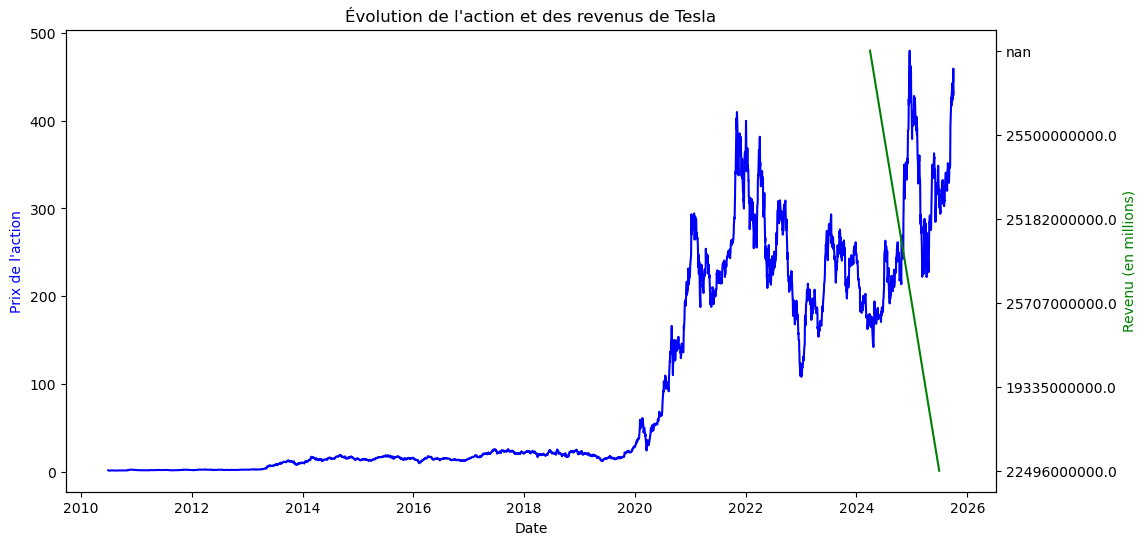

In [13]:
# Fonction utilitaire pour tracer un graphique
def make_graph(stock_data, revenue_data, stock, revenue):
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Prix de l'action", color='blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green')
    ax2.set_ylabel("Revenu (en millions)", color='green')

    plt.title(f"Évolution de l'action et des revenus de {stock}")
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla', 'Revenue')
